<a href="https://colab.research.google.com/github/Suryabhan23/Assigment--1/blob/main/SuryaAR15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
Product_return = pd.read_csv ("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/SalesReturnTable.csv")
Product_return
Product_return.head()

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
4,3631,Dressers,Wrong Size,18000,18000,1


In [21]:
total_return= Product_return.groupby("ProductName")["Returns"].sum()
total_return

,Returns
ProductName,
Bed Frames,406
Bookcases,72
Coffee Tables,168
Desks,43
Dining Chairs,129
Dining Tables,603
Dressers,90
Mattresses,123
Nightstands,61


In [22]:
Sorted_return = total_return.sort_values(ascending=False)
Sorted_return

,Returns
ProductName,
Dining Tables,603
Bed Frames,406
Sofas and Couches,187
Recliners,182
Coffee Tables,168
Dining Chairs,129
Mattresses,123
Wardrobes,93
Dressers,90


In [23]:
cumulative_sum= Sorted_return.cumsum()
cumulative_sum

,Returns
ProductName,
Dining Tables,603
Bed Frames,1009
Sofas and Couches,1196
Recliners,1378
Coffee Tables,1546
Dining Chairs,1675
Mattresses,1798
Wardrobes,1891
Dressers,1981


In [24]:
cumulative_percentage = round(cumulative_sum/Sorted_return.sum()*100,2)
cumulative_percentage

,Returns
ProductName,
Dining Tables,27.20
Bed Frames,45.51
Sofas and Couches,53.95
Recliners,62.16
Coffee Tables,69.73
Dining Chairs,75.55
Mattresses,81.10
Wardrobes,85.30
Dressers,89.35


Text(0, 0.5, 'Cumulative Percentage %')

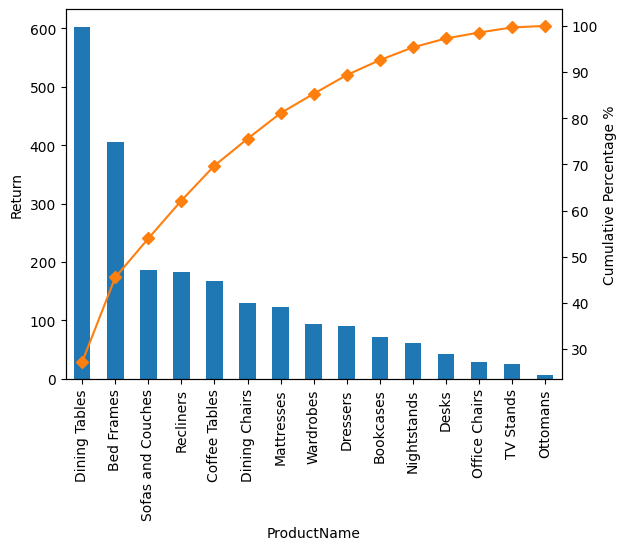

In [25]:
fig,ax1 = plt.subplots()
Sorted_return.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Return')

ax2= ax1.twinx()
cumulative_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('Cumulative Percentage %')

In [26]:
Product_return.head()

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
4,3631,Dressers,Wrong Size,18000,18000,1


In [27]:
Top4_Product = Product_return.query('ProductName in ["Dining Tables","Bed Frames","sofas and Couches","Recliners"]')
Top4_Product

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
12,3639,Recliners,Damage or Defect,25000,50000,2
...,...,...,...,...,...,...
1467,5094,Bed Frames,Damage or Defect,20000,20000,1
1468,5095,Dining Tables,Wrong Size,30000,60000,2
1469,5096,Bed Frames,Damage or Defect,20000,20000,1
1470,5097,Dining Tables,Wrong Size,30000,60000,2


In [28]:
sorted_reasons1 = Top4_Product.groupby("Reason")["Returns"].sum().sort_values(ascending=False)
sorted_reasons1

,Returns
Reason,
Wrong Size,559
Damage or Defect,426
Comfort Issues,52
Assembly Issues,41
Poor Quality,39
Color/Style Mismatch,37
Late Delivery,26
Change of Mind,11


In [31]:
cumulative_reason_percentage=sorted_reasons1.cumsum()/sorted_reasons1.sum()*100
cumulative_reason_percentage

,Returns
Reason,
Wrong Size,46.935348
Damage or Defect,82.703610
Comfort Issues,87.069689
Assembly Issues,90.512175
Poor Quality,93.786734
Color/Style Mismatch,96.893367
Late Delivery,99.076406
Change of Mind,100.000000


Text(0.5, 1.0, 'pareto anlysis of the reason associated with return')

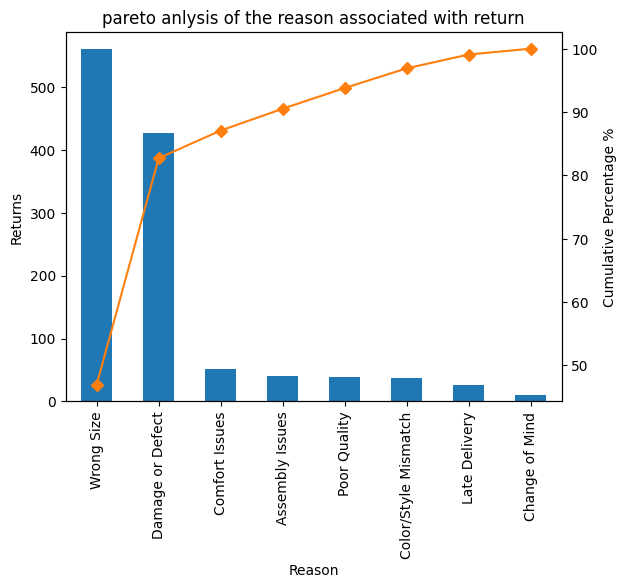

In [32]:
fig, ax1= plt.subplots()
sorted_reasons1.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')
ax2=ax1.twinx()
cumulative_reason_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('Cumulative Percentage %')
plt.title('pareto anlysis of the reason associated with return')